In [41]:
# Import necessary libraries
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input

In [42]:
# Set paths for training and test data
train_dir = r'C:\Users\LEGION\OneDrive\Documents\apple-13-type\Training'
test_dir = r'C:\Users\LEGION\OneDrive\Documents\apple-13-type\Test'


In [43]:
# Ensure directories exist
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("Training or testing directory does not exist!")


In [49]:
# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 8

In [50]:
# Load DenseNet201 for feature extraction
feature_extractor = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor.trainable = False  # Freeze DenseNet201

In [51]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6404 images belonging to 13 classes.
Found 2134 images belonging to 13 classes.


In [52]:
# Build DenseNet201 Transfer Learning model
print("Building DenseNet201 Transfer Learning model...")
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Building DenseNet201 Transfer Learning model...


In [53]:
# Train DenseNet201 Transfer Learning Model
print("Training DenseNet201 Transfer Learning model...")
start_time = time.time()
history = model.fit(train_data, epochs=EPOCHS, validation_data=test_data)
train_time = time.time() - start_time

Training DenseNet201 Transfer Learning model...
Epoch 1/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.1484 - loss: 2.9192 - val_accuracy: 0.6481 - val_loss: 1.1742
Epoch 2/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 481s 2s/step - accuracy: 0.7488 - loss: 0.9009 - val_accuracy: 0.7390 - val_loss: 0.7741
Epoch 3/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.9019 - loss: 0.4334 - val_accuracy: 0.8060 - val_loss: 0.5634
Epoch 4/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 481s 2s/step - accuracy: 0.9638 - loss: 0.2954 - val_accuracy: 0.8880 - val_loss: 0.4036
Epoch 5/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.9843 - loss: 0.2046 - val_accuracy: 0.9021 - val_loss: 0.3498
Epoch 6/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.9941 - loss: 0.1543 - val_accuracy: 0.9269 - val_loss: 0.2849
Epoch 7/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 485s 2s/step - accuracy: 0.9935 - loss: 0.1078 - val_accuracy: 0.9400 - val_loss: 0.2574
Epoch 8/8
201/201 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - ac

In [54]:
# Evaluate DenseNet201 model
print("Evaluating DenseNet201 Transfer Learning model...")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Transfer Learning Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Transfer Learning Training Time: {train_time:.2f} seconds")

Evaluating DenseNet201 Transfer Learning model...
67/67 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.9198 - loss: 0.2646
Transfer Learning Test Accuracy: 93.06%
Transfer Learning Training Time: 3903.53 seconds


In [164]:
# Save the Transfer Learning model
tl_model_path = r'D:\Onedrive\Desktop\L6 II Apple\flask_app\models\densenet201_transfer_learning_model.keras'
model.save(tl_model_path)
print(f"DenseNet201 Transfer Learning model saved at '{tl_model_path}'")

DenseNet201 Transfer Learning model saved at 'D:\Onedrive\Desktop\L6 II Apple\flask_app\models\densenet201_transfer_learning_model.keras'


In [55]:
# Function to extract features using DenseNet201
def extract_features(data, feature_model, batch_size):
    features = []
    labels = []
    for batch_images, batch_labels in data:
        batch_features = feature_model.predict(batch_images)
        print(f"Extracted feature shape: {batch_features.shape}")  # Debugging line
        batch_features = batch_features.reshape(batch_features.shape[0], -1)  # Flatten features
        features.append(batch_features)
        labels.append(batch_labels)
        if len(features) * batch_size >= data.samples:  # Stop when all data is processed
            break
    return np.vstack(features), np.vstack(labels)

In [56]:
# Extract features for training and testing
print("Extracting features for training data...")
train_features, train_labels = extract_features(train_data, feature_extractor, BATCH_SIZE)


Extracting features for training data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━

In [57]:
print("Extracting features for test data...")
test_features, test_labels = extract_features(test_data, feature_extractor, BATCH_SIZE)


Extracting features for test data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted feature shape: (32, 7, 7, 1920)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s

In [58]:
# Convert one-hot encoded labels to integers
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

In [59]:
# Check feature shapes
print(f"Shape of train features: {train_features.shape}")  # Should be (num_samples, 50176)
print(f"Shape of test features: {test_features.shape}")

Shape of train features: (6404, 94080)
Shape of test features: (2134, 94080)


In [119]:
# Train KNN on extracted features and measure training time
print("Training K-Nearest Neighbors classifier...")
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')  # Use 'manhattan', 'minkowski', etc.
knn.fit(train_features, train_labels)
train_time = time.time() - start_time

Training K-Nearest Neighbors classifier...


In [175]:
# Save the KNN model with class information
knn_model_path = r'D:\Onedrive\Desktop\L6 II Apple\flask_app\models\knn_model.joblib'
try:
    joblib.dump(knn, knn_model_path)
    print(f"KNN Model saved at '{knn_model_path}'")
except Exception as e:
    print(f"Error saving KNN model: {e}")

KNN Model saved at 'D:\Onedrive\Desktop\L6 II Apple\flask_app\models\knn_model.joblib'


In [116]:
# Calculate KNN training accuracy
knn_train_predictions = knn.predict(train_features)
knn_training_accuracy = accuracy_score(train_labels, knn_train_predictions)
print(f"KNN Training Accuracy: {knn_training_accuracy * 100:.2f}%")

KNN Training Accuracy: 100.00%


In [167]:
# Evaluate KNN model
print("Evaluating DenseNet201 + KNN model...")
test_predictions = knn.predict(test_features)

Evaluating DenseNet201 + KNN model...


In [168]:
# Calculate metrics
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
print(f"KNN Test Accuracy: {accuracy * 100:.2f}%")
print(f"KNN F1 Score: {f1:.2f}")

KNN Test Accuracy: 93.53%
KNN F1 Score: 0.94


In [169]:
# Generate classification report
print("Classification Report:")
print(classification_report(test_labels, test_predictions, target_names=[str(c) for c in knn.classes_]))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       164
           1       0.99      0.85      0.92       148
           2       0.86      1.00      0.92       160
           3       1.00      1.00      1.00       164
           4       0.95      0.86      0.90       161
           5       0.99      0.95      0.97       164
           6       0.91      0.89      0.90       152
           7       0.81      0.86      0.83       164
           8       0.78      0.79      0.79       164
           9       1.00      0.99      0.99       144
          10       1.00      1.00      1.00       166
          11       1.00      0.93      0.97       164
          12       1.00      1.00      1.00       219

    accuracy                           0.94      2134
   macro avg       0.94      0.93      0.93      2134
weighted avg       0.94      0.94      0.94      2134



In [170]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[164   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   4  18   0   0   0   0   0]
 [  0   0 160   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 164   0   0   0   0   0   0   0   0   0]
 [  0   0  22   0 139   0   0   0   0   0   0   0   0]
 [  0   0   0   0   8 156   0   0   0   0   0   0   0]
 [  3   0   0   0   0   1 136   0  12   0   0   0   0]
 [  0   1   0   0   0   0   9 141  13   0   0   0   0]
 [ 14   0   4   0   0   0   0  16 130   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0 142   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 166   0   0]
 [  0   0   0   0   0   0   0   0  11   0   0 153   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 219]]


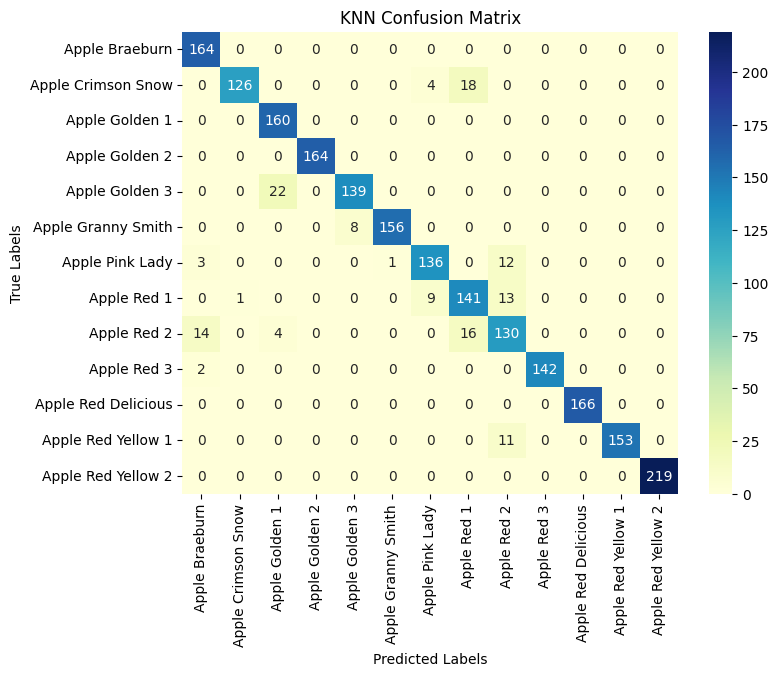

In [171]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()

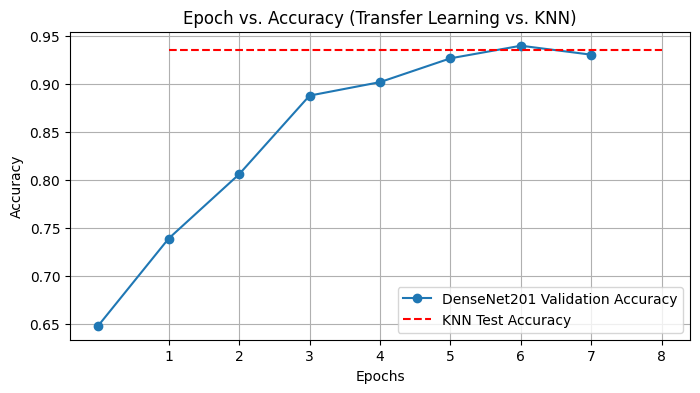

In [172]:
# Plotting training and validation accuracy for DenseNet201
plt.figure(figsize=(8, 4))

# DenseNet201 accuracy
plt.plot(history.history['val_accuracy'], label='DenseNet201 Validation Accuracy', marker='o')

# KNN accuracy (horizontal line as it doesn't have epochs)
knn_accuracy_line = [accuracy] * len(history.epoch)
plt.plot(range(1, len(history.epoch) + 1), knn_accuracy_line, label='KNN Test Accuracy', linestyle='--', color='red')

# Formatting the plot
plt.title('Epoch vs. Accuracy (Transfer Learning vs. KNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(history.epoch) + 1))
plt.legend()
plt.grid(True)
plt.show()


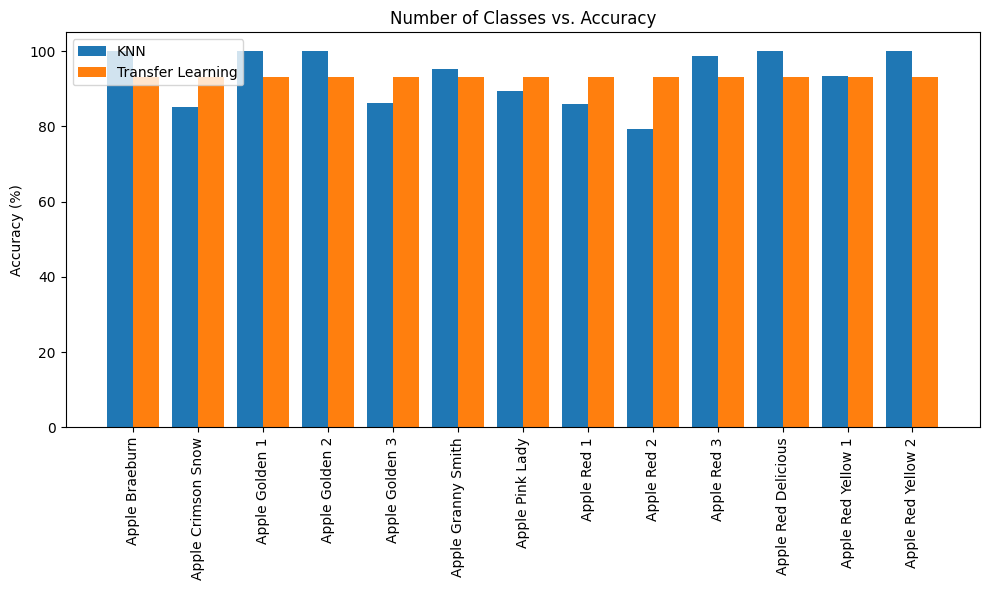

In [173]:
# Calculate per-class accuracy for KNN
class_accuracies = []
for cls in range(len(test_data.class_indices)):
    cls_indices = test_labels == cls
    cls_accuracy = accuracy_score(test_labels[cls_indices], test_predictions[cls_indices])
    class_accuracies.append(cls_accuracy)

# Create a bar chart comparing per-class accuracy
classes = list(test_data.class_indices.keys())
x = np.arange(len(classes))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, [accuracy * 100 for accuracy in class_accuracies], 0.4, label='KNN')
plt.bar(x + 0.2, [test_accuracy * 100] * len(classes), 0.4, label='Transfer Learning')
plt.xticks(x, classes, rotation=90)
plt.ylabel('Accuracy (%)')
plt.title('Number of Classes vs. Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [174]:
# Predict using KNN model on new data
def predict_image(image_path, model, feature_extractor, knn):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array) 

    # Extract features from image
    features = feature_extractor.predict(img_array)
    features = features.reshape(1, -1)  # Flatten the features

    # Make prediction using KNN
    prediction = knn.predict(features)
    print(f"Predicted Class: {prediction}")
    return prediction

# Example prediction
prediction  = predict_image(r'c:\Users\LEGION\Downloads\purepng.com-golden-applefoodsweettastyhealthyfruitapplegirl-981524680516epzoc.png', model, feature_extractor, knn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
Predicted Class: [2]


In [152]:
import numpy as np

img = image.load_img(r"c:\Users\LEGION\Downloads\bd6adcd84e724256ea468cd158287851.jpg", target_size=IMG_SIZE)
img_array = image.img_to_array(img)

In [153]:
img_array.reshape(1,-1)

array([[36., 39., 48., ...,  8., 12., 23.]], dtype=float32)

In [154]:
knn.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [155]:
class_to_idx = test_data.class_indices

In [156]:
idx_to_class = {i:j for i, j in enumerate(test_data.class_indices.keys())}

In [157]:
idx_to_class

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2'}

In [158]:
import json

with open('idx_to_class.json', 'w') as fp:
    json.dump(idx_to_class,fp)

In [159]:
prediction

array([2])

In [160]:
list(knn.classes_)[prediction[0]]

np.int64(2)